# This Notebook is for Models and Charts

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [208]:
figmathon = pd.read_csv('WCD_Figma_Matched.csv')

In [209]:
figmathon.dropna(thresh=5)

,Unnamed: 0,Match,Team,Set,FiGMA_TDAC,FiGMA_TDA3,FiGMA_TDA5,FiGMA_Win,FiGMA_Assist,FiGMA_Start,Home,Set_Win,Opp_Team,Opp_FiGMA_TDAC,Opp_FiGMA_TDA3,Opp_FiGMA_TDA5,Opp_FiGMA_Win,Opp_FiGMA_Assist,Opp_FiGMA_Start
0,0,5731394f0d39b85a663cde40,Dart Simpson,1.0,NaN,NaN,46.592716,0.266667,NaN,0.500000,1.0,0.0,M.O.D. Squad,NaN,NaN,40.872899,0.400000,NaN,0.300000
1,1,5731394f0d39b85a663cde40,Dart Simpson,2.0,2.050000,48.833333,56.160714,0.222222,0.200000,0.311111,1.0,1.0,M.O.D. Squad,1.833333,53.750000,31.225000,0.366667,2.333333e-01,0.200000
2,2,5731394f0d39b85a663cde40,Dart Simpson,3.0,1.826087,NaN,NaN,0.533333,NaN,0.366667,1.0,1.0,M.O.D. Squad,1.632606,NaN,NaN,0.533333,NaN,0.266667
3,3,5731394f0d39b85a663cde40,Dart Simpson,4.0,2.647059,50.166667,NaN,0.550000,0.150000,0.300000,1.0,1.0,M.O.D. Squad,1.583333,52.200000,NaN,0.100000,1.155742e-14,0.450000
4,4,5731394f0d39b85a663cde40,Dart Simpson,5.0,NaN,19.479167,NaN,0.066667,NaN,0.383333,1.0,0.0,M.O.D. Squad,NaN,31.676535,NaN,0.500000,NaN,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18585,18585,5e683d43d4649e21a0e97ea1,Shoot To Kill,5.0,2.010286,NaN,39.354223,0.300000,NaN,0.425000,1.0,0.0,Dart Daddies,2.155773,NaN,48.508616,0.700000,NaN,0.400000
18586,18586,5e683d43d4649e21a0e97ea1,Shoot To Kill,6.0,NaN,28.600923,NaN,0.233333,0.233333,0.233333,1.0,1.0,Dart Daddies,NaN,30.661180,NaN,0.400000,4.000000e-01,0.250000
18587,18587,5e683d43d4649e21a0e97ea1,Shoot To Kill,7.0,NaN,25.617976,NaN,0.066667,0.066667,0.416667,1.0,0.0,Dart Daddies,NaN,29.142930,NaN,0.233333,2.333333e-01,0.283333
18588,18588,5e683d43d4649e21a0e97ea1,Shoot To Kill,8.0,1.864261,NaN,NaN,0.800000,NaN,0.266667,1.0,1.0,Dart Daddies,1.803475,NaN,NaN,0.266667,NaN,0.566667


In [5]:
# Optional cumulative TDAs
"""
cumfig = figmathon['FiGMA_TDA3']
cumfig = cumfig.add(figmathon['FiGMA_TDA5'], fill_value=0)
cumfig = cumfig.add(figmathon['FiGMA_TDAC'], fill_value=0)

oppcumfig = figmathon['Opp_FiGMA_TDA3']
oppcumfig = oppcumfig.add(figmathon['Opp_FiGMA_TDA5'], fill_value=0)
oppcumfig = oppcumfig.add(figmathon['Opp_FiGMA_TDAC'], fill_value=0)

figmathon['CumFigTDA'] = cumfig
figmathon['OppCumFigTDA'] = oppcumfig
"""

In [210]:
figmathon = figmathon.fillna(0)

In [211]:
# Delta features for model
figmathon['FiGMA_TDAC_Diff'] = figmathon['FiGMA_TDAC'] - figmathon['Opp_FiGMA_TDAC']
figmathon['FiGMA_TDA3_Diff'] = figmathon['FiGMA_TDA3'] - figmathon['Opp_FiGMA_TDA3']
figmathon['FiGMA_TDA5_Diff'] = figmathon['FiGMA_TDA5'] - figmathon['Opp_FiGMA_TDA5']
figmathon['FiGMA_Start%_Diff'] = figmathon['FiGMA_Start'] - figmathon['Opp_FiGMA_Start']
figmathon['FiGMA_LWin%_Diff'] = figmathon['FiGMA_Win'] - figmathon['Opp_FiGMA_Win']
figmathon['FiGMA_LAssist%_Diff'] = figmathon['FiGMA_Assist'] - figmathon['Opp_FiGMA_Assist']

In [213]:
# Percent of difference from Home Team
figmathon['CDP'] = figmathon['FiGMA_TDAC_Diff']/figmathon['FiGMA_TDAC']
figmathon['3DP'] = figmathon['FiGMA_TDA3_Diff']/figmathon['FiGMA_TDA3']
figmathon['5DP'] = figmathon['FiGMA_TDA5_Diff']/figmathon['FiGMA_TDA5']

In [214]:
figmathon = figmathon.fillna(0)

In [215]:
# Cumulative difference
figmathon['Cum_Per_Diff'] = figmathon['CDP'] + figmathon['3DP'] + figmathon['5DP']

In [216]:
figmathon['Cum_Per_Diff'].value_counts()

-inf         6
 0.021167    2
-0.217981    2
-0.007840    2
 0.021338    1
            ..
 0.236073    1
-0.173109    1
-0.009660    1
-0.772481    1
 0.053824    1
Name: Cum_Per_Diff, Length: 18582, dtype: int64

In [217]:
# Remove negative infinities and abnormally low numbers
neginf = figmathon['Cum_Per_Diff'] < -5

In [218]:
neginf.value_counts()

False    18580
True        10
Name: Cum_Per_Diff, dtype: int64

In [219]:
figmathon = figmathon.mask(neginf)

In [220]:
figmathon.dropna()

,Unnamed: 0,Match,Team,Set,FiGMA_TDAC,FiGMA_TDA3,FiGMA_TDA5,FiGMA_Win,FiGMA_Assist,FiGMA_Start,...,FiGMA_TDAC_Diff,FiGMA_TDA3_Diff,FiGMA_TDA5_Diff,FiGMA_Start%_Diff,FiGMA_LWin%_Diff,FiGMA_LAssist%_Diff,CDP,3DP,5DP,Cum_Per_Diff
0,0.0,5731394f0d39b85a663cde40,Dart Simpson,1.0,0.000000,0.000000,46.592716,0.266667,0.000000,0.500000,...,0.000000,0.000000,5.719817,0.200000,-1.333333e-01,0.000000,0.000000,0.000000,0.122762,0.122762
1,1.0,5731394f0d39b85a663cde40,Dart Simpson,2.0,2.050000,48.833333,56.160714,0.222222,0.200000,0.311111,...,0.216667,-4.916667,24.935714,0.111111,-1.444444e-01,-0.033333,0.105691,-0.100683,0.444006,0.449015
2,2.0,5731394f0d39b85a663cde40,Dart Simpson,3.0,1.826087,0.000000,0.000000,0.533333,0.000000,0.366667,...,0.193481,0.000000,0.000000,0.100000,-2.009504e-14,0.000000,0.105954,0.000000,0.000000,0.105954
3,3.0,5731394f0d39b85a663cde40,Dart Simpson,4.0,2.647059,50.166667,0.000000,0.550000,0.150000,0.300000,...,1.063725,-2.033333,0.000000,-0.150000,4.500000e-01,0.150000,0.401852,-0.040532,0.000000,0.361320
4,4.0,5731394f0d39b85a663cde40,Dart Simpson,5.0,0.000000,19.479167,0.000000,0.066667,0.000000,0.383333,...,0.000000,-12.197368,0.000000,0.333333,-4.333333e-01,0.000000,0.000000,-0.626175,0.000000,-0.626175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18585,18585.0,5e683d43d4649e21a0e97ea1,Shoot To Kill,5.0,2.010286,0.000000,39.354223,0.300000,0.000000,0.425000,...,-0.145487,0.000000,-9.154393,0.025000,-4.000000e-01,0.000000,-0.072371,0.000000,-0.232615,-0.304987
18586,18586.0,5e683d43d4649e21a0e97ea1,Shoot To Kill,6.0,0.000000,28.600923,0.000000,0.233333,0.233333,0.233333,...,0.000000,-2.060257,0.000000,-0.016667,-1.666667e-01,-0.166667,0.000000,-0.072035,0.000000,-0.072035
18587,18587.0,5e683d43d4649e21a0e97ea1,Shoot To Kill,7.0,0.000000,25.617976,0.000000,0.066667,0.066667,0.416667,...,0.000000,-3.524954,0.000000,0.133333,-1.666667e-01,-0.166667,0.000000,-0.137597,0.000000,-0.137597
18588,18588.0,5e683d43d4649e21a0e97ea1,Shoot To Kill,8.0,1.864261,0.000000,0.000000,0.800000,0.000000,0.266667,...,0.060787,0.000000,0.000000,-0.300000,5.333333e-01,0.000000,0.032606,0.000000,0.000000,0.032606


In [221]:
# Save
# figmathon.to_csv('figmathon_deltas.csv')

# One Hot Encode Sets

In [222]:
figmathon = pd.read_csv('figmathon_deltas.csv')

In [223]:
figmathon['Set_Win'].value_counts()

1.0    9374
0.0    9206
Name: Set_Win, dtype: int64

In [224]:
figmathon = figmathon.dropna()

In [225]:
figmathon['Set 1'] = figmathon['Set'] == 1
figmathon['Set 2'] = figmathon['Set'] == 2
figmathon['Set 3'] = figmathon['Set'] == 3
figmathon['Set 4'] = figmathon['Set'] == 4
figmathon['Set 5'] = figmathon['Set'] == 5
figmathon['Set 6'] = figmathon['Set'] == 6
figmathon['Set 7'] = figmathon['Set'] == 7
figmathon['Set 8'] = figmathon['Set'] == 8

# Model testing

In [280]:
#Copy data in case of errors
figs = figmathon.copy()

In [281]:
# Train Test Split
set_train, set_test = train_test_split(figs, test_size=0.2, random_state=64)

In [ ]:
# Select Features

#X = ['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5', 'Set 6', 'Set 7', 'Set 8','Cum_Per_Diff']
    
X = ['FiGMA_TDAC_Diff', 'FiGMA_TDA3_Diff', 'FiGMA_TDA5_Diff', 'FiGMA_Start%_Diff', 'FiGMA_LWin%_Diff', 
     'FiGMA_LAssist%_Diff']
y = 'Set_Win'

In [282]:
# Logistic Regression
lm = LogisticRegression(solver='newton-cg', C=1)
lm.fit(set_train[X], set_train[y])

LogisticRegression(C=1, solver='newton-cg')

In [250]:
# Check Accuracy
set_eval = set_test.copy()
set_eval['Prediction'] = lm.predict(set_test[X])
set_eval.loc[:,'Prediction'] = set_eval['Prediction'].astype('category')
set_eval['correct_pred'] = set_eval['Set_Win'] == set_eval['Prediction']

In [251]:
setpreds = set_eval['correct_pred']
setpreds.value_counts()

True     2901
False     815
Name: correct_pred, dtype: int64

In [252]:
# Try a KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(set_train[X], set_train[y])
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(set_train[X], set_train[y])))
print("Test set: {:6.2f}%".format(100*knn.score(set_test[X], set_test[y])))

The score for kNN is
Training:  80.07%
Test set:  72.15%


In [253]:
print("kNN confusion matrix: \n\n", confusion_matrix(set_test[y], knn.predict(set_test[X])))

kNN confusion matrix: 

 [[1347  526]
 [ 509 1334]]


In [254]:
knn_predict = knn.predict(set_test[X])
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(set_test[y], knn_predict), 
                                                     recall_score(set_test[y], knn_predict)))

Default threshold:
Precision: 0.7172,   Recall: 0.7238


In [255]:
# Try LR with stronger regularization
logit = LogisticRegression(C = 0.5)
logit.fit(set_train[X], set_train[y])
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(set_train[X], set_train[y])))
print("Test set: {:6.2f}%".format(100*logit.score(set_test[X], set_test[y])))

The score for logistic regression is
Training:  76.00%
Test set:  78.01%


In [284]:
print("Log confusion matrix: \n\n", confusion_matrix(set_test[y], logit.predict(set_test[X])))

Log confusion matrix: 

 [[1465  408]
 [ 409 1434]]


In [285]:
log_predict = logit.predict(set_test[X])
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(set_test[y], log_predict), 
                                                     recall_score(set_test[y], log_predict)))

Default threshold:
Precision: 0.7785,   Recall: 0.7781


In [286]:
log_predict = (logit.predict_proba(set_test[X])[:,1] > .58)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(set_test[y], log_predict), 
                                                     recall_score(set_test[y], log_predict)))

Default threshold:
Precision: 0.8104,   Recall: 0.6956


In [292]:
from sklearn.naive_bayes import GaussianNB
# Try Guassian Naive Bayes

clf = GaussianNB()
clf.fit(set_train[X], set_train[y])
print("The score for Gaussian Naive Bayes is")
print("Training: {:6.2f}%".format(100*clf.score(set_train[X], set_train[y])))
print("Test set: {:6.2f}%".format(100*clf.score(set_test[X], set_test[y])))

The score for Gaussian Naive Bayes is
Training:  75.61%
Test set:  77.74%


In [288]:
print("Naive Bayes confusion matrix: \n\n", confusion_matrix(set_test[y], clf.predict(set_test[X])))

Naive Bayes confusion matrix: 

 [[1475  398]
 [ 429 1414]]


In [289]:
gnb_predict = clf.predict(set_test[X])
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(set_test[y], gnb_predict), 
                                                     recall_score(set_test[y], gnb_predict)))

Default threshold:
Precision: 0.7804,   Recall: 0.7672


In [290]:
gnb_predict = (clf.predict_proba(set_test[X])[:,1] > .618)
print(".7 threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(set_test[y], gnb_predict), 
                                                     recall_score(set_test[y], gnb_predict)))

.7 threshold:
Precision: 0.8102,   Recall: 0.7016


In [291]:
gnb_predict = (clf.predict_proba(set_test[X])[:,1] > .35)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(set_test[y], gnb_predict), 
                                                     recall_score(set_test[y], gnb_predict)))

Default threshold:
Precision: 0.7250,   Recall: 0.8313


In [293]:
figs['LogProba'] = logit.predict_proba(figs[X])[:,1]
figs['GNBProba'] = clf.predict_proba(figs[X])[:,1]
figs['AVGVoteProba'] = (figs['LogProba'] + figs['GNBProba'])/2
figs['AVGVotePrediction'] = (figs['AVGVoteProba'] > .8)
figs['AVGVoteCorrect'] = figs['AVGVotePrediction'] == figs['Set_Win']
figs['AVGVoteIncorrect'] = figs['AVGVotePrediction'] != figs['Set_Win']

In [267]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(set_test[y], clf.predict_proba(set_test[X])[:,1])

ROC AUC score =  0.8509374006898732


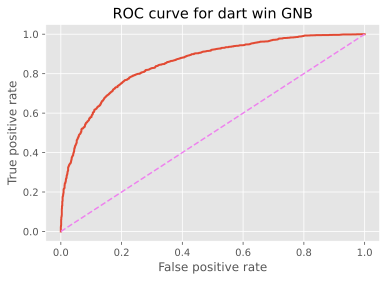

In [268]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for dart win GNB');
print("ROC AUC score = ", roc_auc_score(set_test[y], clf.predict_proba(set_test[X])[:,1]))

In [296]:
avg_proba = (((clf.predict_proba(set_test[X])[:,1]) + (logit.predict_proba(set_test[X])[:,1])) /2) > .63

In [297]:
print("Average Vote:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(set_test[y], avg_proba), 
                                                     recall_score(set_test[y], avg_proba)))

Average Vote:
Precision: 0.8218,   Recall: 0.6782


## Charts

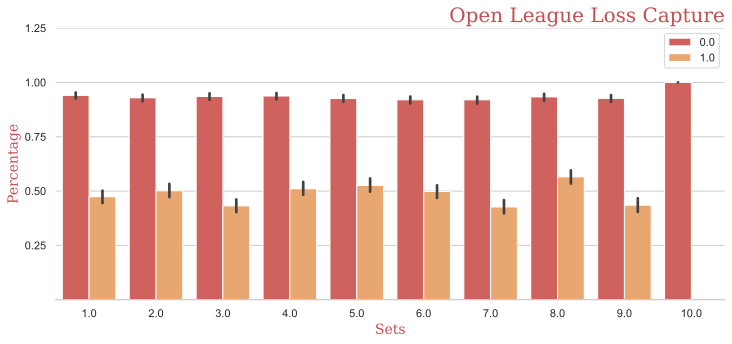

In [301]:
# Loss capture chart

sns.set_theme(style="whitegrid",
              palette = sns.color_palette("Spectral"))

f, ax = plt.subplots(figsize=(12, 5))
sns.despine(left=True)

sns.barplot(data=figs, x="Set", y="AVGVoteCorrect", hue = "Set_Win");


plt.title('Open League Loss Capture',family='serif',fontsize = 20,
          loc='right',color='r')

plt.xlabel('Sets',fontsize = 14,family='serif', color='r')
plt.ylabel('Percentage',fontsize = 14,family='serif', color='r')
plt.legend(loc = 1);

ax.set_yticks([.25, .5, .75, 1, 1.25])

#plt.savefig('OLLossCapture.png')